In [30]:
#------Torch Imports-------

import torch
import torch.nn as nn # The main neural netowrk
import torch.optim as optim # Used to load optimizers like (ADAM, SGD etc..)
import torchvision # Used to load images
from torchvision import transforms # Used to tranform images into tensors
from torchvision.datasets import MNIST # Importing the MNIST Data set
from torch.utils.data import random_split, DataLoader # Random Split to split data into train, test and validating set of data, while dataLoader is used to load data in batches
#------Torch Imports-------



#----Data Manipulation and viewing-----
import pandas as pd # For data manipulation (I don't think it'll be used here )
import matplotlib.pyplot as plt # To mainly view the images
import seaborn as sns # To make the images look better
#----Data Manipulation and viewing-----

#----To manage the path of the directories that stores data and models-----
import os # To help with the path and stuff
import sys # Like wiseas os 



In [31]:
sys.path.append((os.path.abspath('..')))

In [32]:
device = "cuda" if torch.cuda.is_available else 'cpu'

print(device)

cuda


In [33]:
dataset = MNIST(root='/Data', download=True)

In [34]:
print(f"Lenght of the data: {len(dataset)}")
print(f"Shape of the data {MNIST_DATA_DOWNLOAD.data.shape}")

Lenght of the data: 60000
Shape of the data torch.Size([60000, 28, 28])


Label: 2


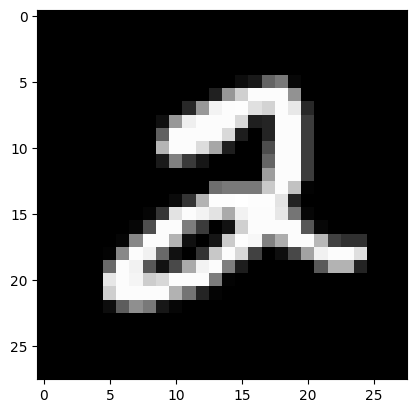

In [35]:
image, label = dataset[5]
plt.imshow(image, cmap='gray')
print(f"Label: {label}")

In [36]:
mnist_dataset = MNIST(download=True, root='../Data', transform=transforms.ToTensor())
print(mnist_dataset)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:19<00:00, 521kB/s]


Extracting ../Data\MNIST\raw\train-images-idx3-ubyte.gz to ../Data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 103kB/s]


Extracting ../Data\MNIST\raw\train-labels-idx1-ubyte.gz to ../Data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:02<00:00, 629kB/s]


Extracting ../Data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../Data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]

Extracting ../Data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../Data\MNIST\raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [39]:
image_tensor, label = mnist_dataset[0]
print(f"Image tensor {image_tensor}")
print(f"label: {label}")

Image tensor tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.

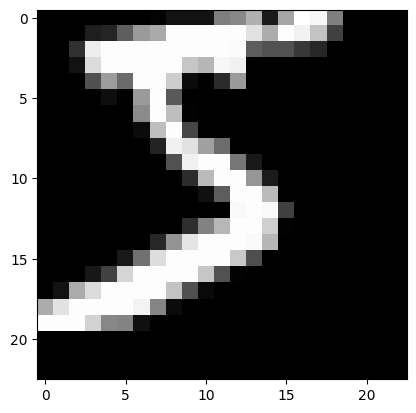

In [46]:
plt.imshow(image_tensor[0,5:60,5:60],cmap = 'gray')

In [50]:
train_data, validate_data = random_split(mnist_dataset, [50000, 10000])

image,label = train_data[0]

# plt.imshow(image[0, 5:60, 5:60], cmap='gray')

In [58]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle=True)
val_loader = DataLoader(validate_data, batch_size, shuffle=False)

input_size = 28 * 28
num_classes = 10 

In [ ]:
class MNISTModel(nn.Module):
    def __init__(self): 
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def display_model(self):
        return self.linear.parameters, self.linear.weight.shape, self.linear.weight, self.linear.bias, self.linear.bias.shape
    
    def model(self, input, output):
        return self.linear(input, output)


